In [1]:
from Circuit import *
from Chiplet import *
from HighwayOccupancy import *
from Router import *
from MECHBenchmarks import *
import json
import os
%load_ext autoreload
%autoreload 2

directory_path = "exp_data"
if not os.path.exists(directory_path):
    os.makedirs(directory_path)


In [6]:
lane_num = 3

structure = 'square'
chip_col_num = 2
chip_row_num = 2

## Automatic Highway Layout: Single Lane

highway percentage =  0.13580246913580246


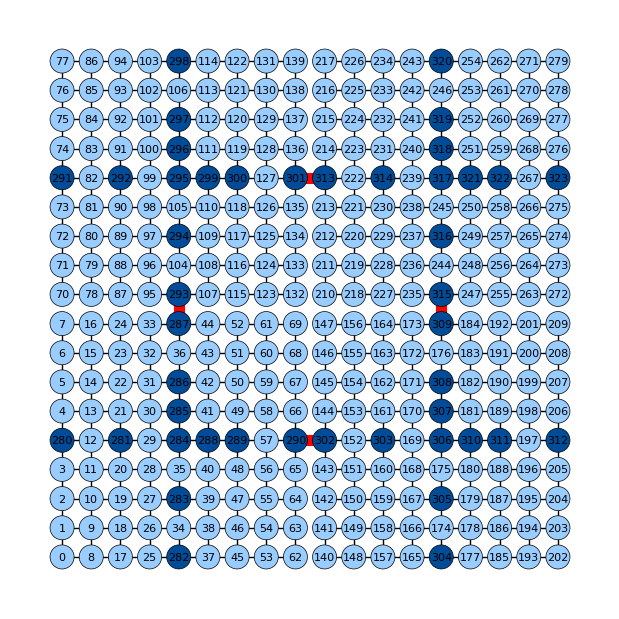

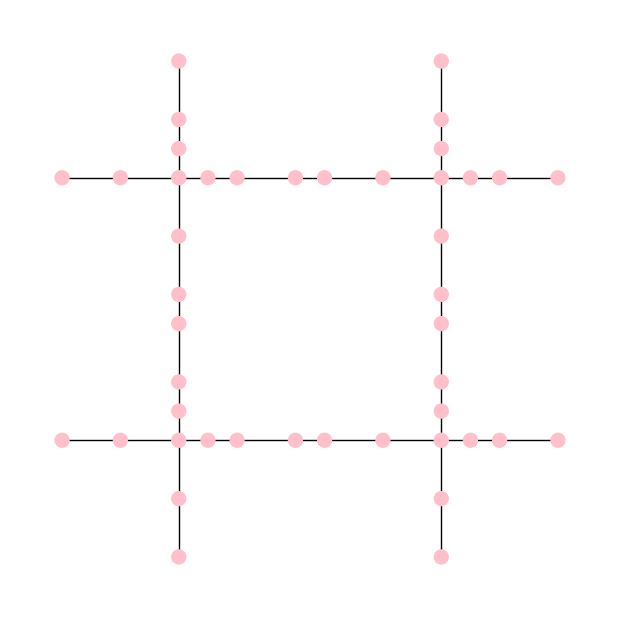

In [3]:
if lane_num == 1:
    x_num, y_num = 9,9
    G=gen_chiplet_array(structure, chip_col_num, chip_row_num, x_num, y_num, cross_link_sparsity=1)

    gen_highway_layout(G)
    print('highway percentage = ', len(get_highway_qubits(G))/len(G.nodes))
    draw_lattice(G,size=6, with_labels=True)

    get_highway_coupling_graph(G).draw(size=6)

## Customized Highway Layout: Double Lanes
#### Define the layout on one chiplet, automatic generation for others

highway percentage =  0.24691358024691357


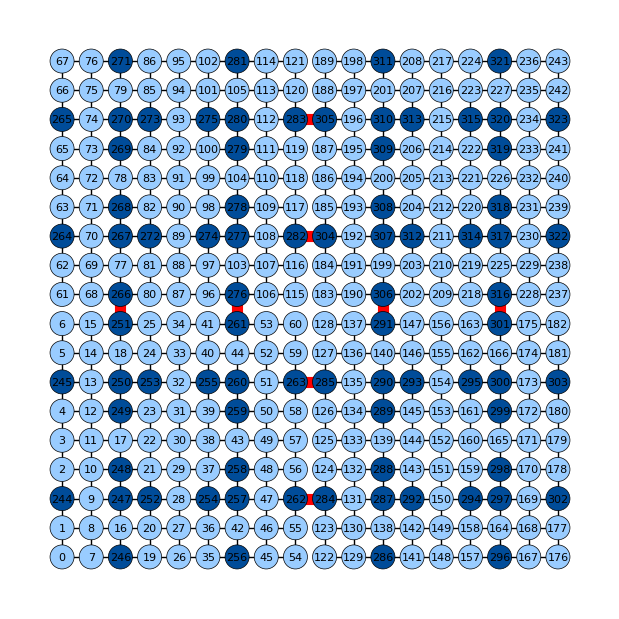

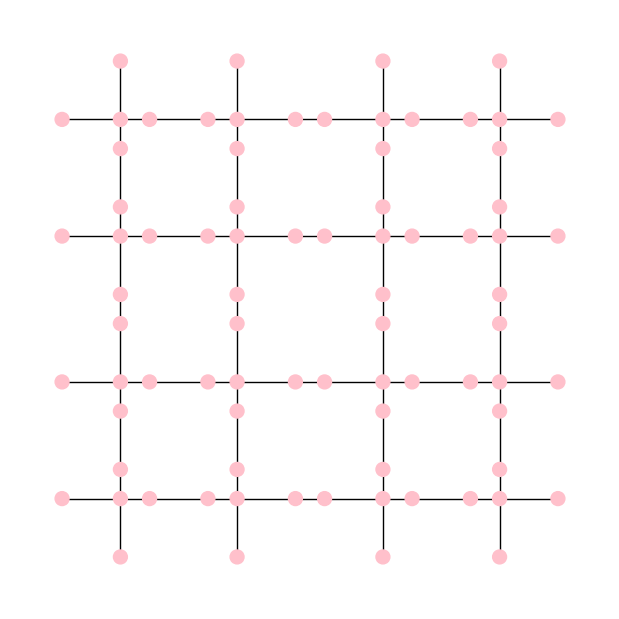

In [5]:
if lane_num == 2:
    x_num, y_num = 9,9
    G=gen_chiplet_array(structure,chip_col_num, chip_row_num,x_num, y_num, cross_link_sparsity=2)

    custom_highway_qubits = []
    custom_highway_edges = []

    for i in [2,6]:
        for j in [0,2,3,5,6,8]:
            custom_highway_qubits.append((i,j))
            custom_highway_qubits.append((j,i))

    custom_highway_layout(G, custom_highway_qubits)
    print('highway percentage = ', len(get_highway_qubits(G))/len(G.nodes))
    draw_lattice(G,size=6, with_labels=True)

    get_highway_coupling_graph(G).draw(size=6)

## Customized Highway Layout: Triple Lanes
#### Define the layout on one chiplet, automatic generation for others

highway percentage =  0.4074074074074074


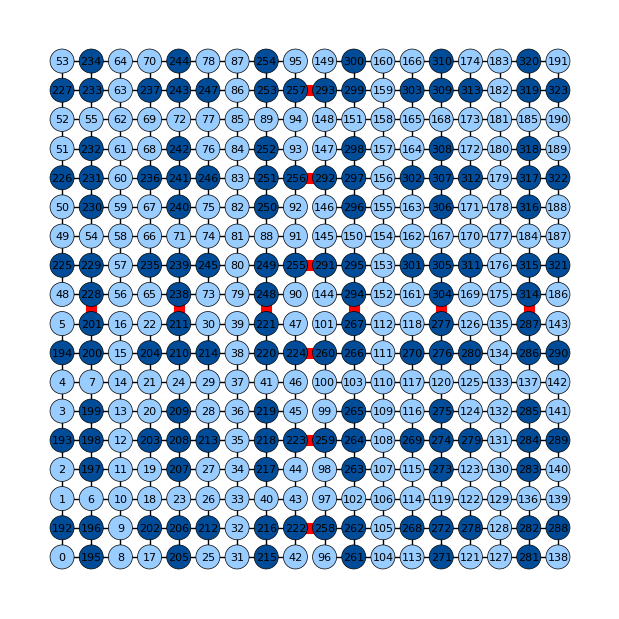

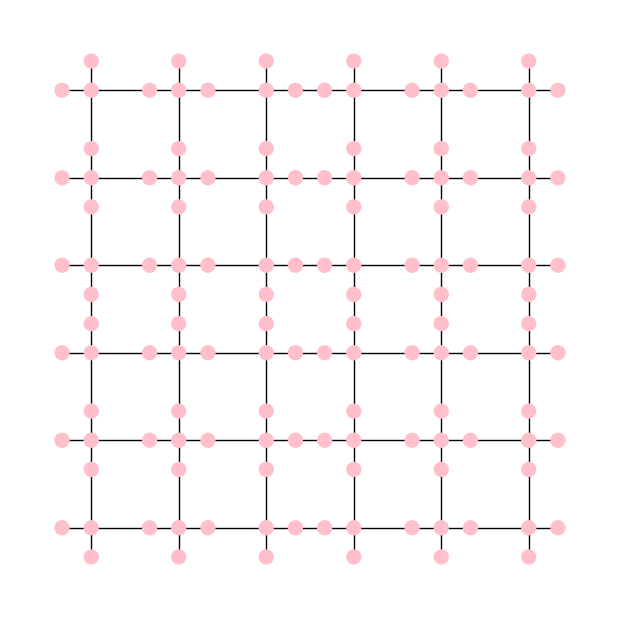

In [7]:
if lane_num == 3:
    x_num, y_num = 9,9
    G=gen_chiplet_array(structure,chip_col_num, chip_row_num,x_num, y_num, cross_link_sparsity=3)

    custom_highway_qubits = []
    custom_highway_edges = []

    x_list = [1,4,7]
    y_list = [0,1,3,4,5,7,8]
    for i,x in enumerate(x_list):
        for j,y in enumerate(y_list):
            custom_highway_qubits.append((x,y))
            custom_highway_qubits.append((y,x))
            if j>0:
                custom_highway_edges.append(((x, y_list[j-1]), (x,y)))
                custom_highway_edges.append(((y,x), (y_list[j-1], x)))
                
    custom_highway_qubits += []
  

    custom_highway_layout(G, custom_highway_qubits, custom_highway_edges)
    print('highway percentage = ', len(get_highway_qubits(G))/len(G.nodes))
    draw_lattice(G,size=6, with_labels=True)

    get_highway_coupling_graph(G).draw(size=6)

In [9]:
chiplet_array_dim=(chip_col_num, chip_row_num)
chiplet_size=(x_num, y_num)

exp_result = MECH_experiments(structure=structure, chiplet_array_dim=chiplet_array_dim, chiplet_size=chiplet_size, custom_highway_qubits=custom_highway_qubits, custom_highway_edges=custom_highway_edges, cross_link_sparsity=lane_num)
print(exp_result)

structure_abbr = '_'.join([s[:3] for s in structure.split('_')])
file_path = "./exp_data/{}{}{}{}{}_lane{}.json".format(structure_abbr, chiplet_array_dim[0], chiplet_array_dim[1], chiplet_size[0], chiplet_size[1], lane_num)

with open(file_path, 'w') as json_file:
    json.dump(exp_result, json_file)

print(f"The dictionary has been written to {file_path}")

9168/18336 gates are selected: [(0, 1), (0, 7), (0, 8), (0, 9), (0, 15), (0, 18), (0, 19), (0, 20), (0, 22), (0, 23)]...[(185, 187), (185, 188), (185, 191), (186, 187), (186, 188), (187, 189), (187, 190), (188, 189), (188, 190), (189, 190)]
----------------executing  vqe
0/191
10/191
20/191
30/191
40/191
50/191
60/191
70/191
80/191
90/191
100/191
110/191
120/191
130/191
140/191
150/191
160/191
170/191
180/191
190/191
----------------executing  qft
0/191
10/191
20/191
30/191
40/191
50/191
60/191
70/191
80/191
90/191
100/191
110/191
120/191
130/191
140/191
150/191
160/191
170/191
180/191
190/191
----------------executing  qaoa
0/189
10/189
20/189
30/189
40/189
50/189
60/189
70/189
80/189
90/189
100/189
110/189
120/189
130/189
140/189
150/189
160/189
170/189
180/189
----------------executing  bv
0/1
defaultdict(<class 'dict'>, {'vqe': {'depth': 3603, 'eff_gate_num': 104050.0, 'on-chip': 51861, 'cross-chip': 2088, 'meas_num': 16699, 'weight': (7.4, 2.2), 'periods': (13, 2), 'shuttle_num': 